In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

importing a dataset

In [ ]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df_test =pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

merge both data

In [ ]:
df_final = df_train.append(df_test)
df_final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369128 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     369128 non-null  int64  
 1   Product_ID                  369128 non-null  object 
 2   Gender                      369128 non-null  object 
 3   Age                         369128 non-null  object 
 4   Occupation                  369128 non-null  int64  
 5   City_Category               369128 non-null  object 
 6   Stay_In_Current_City_Years  369128 non-null  object 
 7   Marital_Status              369128 non-null  int64  
 8   Product_Category_1          369128 non-null  int64  
 9   Product_Category_2          254594 non-null  float64
 10  Product_Category_3          112413 non-null  float64
 11  Purchase                    135528 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 36.6+ MB


In [ ]:
df_final.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.691280e+05,369128.000000,369128.000000,369128.000000,254594.000000,112413.000000,135528.000000
mean,1.002948e+06,8.086561,0.409712,5.285727,9.851458,12.665626,9300.093700
std,1.727870e+03,6.526245,0.491781,3.738564,5.091558,4.124028,4980.141216
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001447e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5847.000000
50%,1.002913e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.004406e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12057.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
df_final.drop(['User_ID'],axis=1,inplace=True)
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


handling the categorical feature
1 -> Gender

convert categorical features into numeric one
for gender we used map function to get numeric value

In [ ]:
df_final['Gender']= df_final['Gender'].map({'F':0,'M':1})

In [ ]:
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


2 -> Age

In [ ]:
df_final['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df_final['Age']= df_final['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7 })

##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

In [ ]:
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


3-> city categorical

In [ ]:
df_city=pd.get_dummies(df_final['City_Category'],drop_first=True)

In [ ]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df = pd.concat([df_final,df_city],axis=1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
#drop city categorical feature
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


missing values

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            114534
Product_Category_3            256715
Purchase                      233600
B                                  0
C                                  0
dtype: int64

focus on replacing missing values

In [ ]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     43014
14.0    37487
2.0     33394
16.0    29295
15.0    25527
4.0     17468
5.0     17458
6.0     11159
11.0     9571
17.0     9077
13.0     7159
9.0      3921
12.0     3698
10.0     2105
3.0      1947
18.0     1932
7.0       382
Name: Product_Category_2, dtype: int64

for discrete value 
replace missing value with mode

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_2'].isnull().sum()

0

product category 3 replace missing value

In [ ]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df['Product_Category_3'].value_counts()

16.0    21797
15.0    18861
14.0    12404
17.0    11344
5.0     11274
8.0      8413
9.0      7948
12.0     6208
13.0     3744
6.0      3175
18.0     3127
4.0      1279
11.0     1236
10.0     1197
3.0       406
Name: Product_Category_3, dtype: int64

In [ ]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df['Product_Category_3'].isnull().sum()

0

#stay for current years =>  remove + sign

In [ ]:
#stay for current years remove + sign
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


converting object into integers


In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369128 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  369128 non-null  object 
 1   Gender                      369128 non-null  int64  
 2   Age                         369128 non-null  int64  
 3   Occupation                  369128 non-null  int64  
 4   Stay_In_Current_City_Years  369128 non-null  int64  
 5   Marital_Status              369128 non-null  int64  
 6   Product_Category_1          369128 non-null  int64  
 7   Product_Category_2          369128 non-null  float64
 8   Product_Category_3          369128 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           369128 non-null  uint8  
 11  C                           369128 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 31.7+ MB


In [ ]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369128 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  369128 non-null  object 
 1   Gender                      369128 non-null  int64  
 2   Age                         369128 non-null  int64  
 3   Occupation                  369128 non-null  int64  
 4   Stay_In_Current_City_Years  369128 non-null  int64  
 5   Marital_Status              369128 non-null  int64  
 6   Product_Category_1          369128 non-null  int64  
 7   Product_Category_2          369128 non-null  float64
 8   Product_Category_3          369128 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           369128 non-null  int64  
 11  C                           369128 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 36.6+ MB


visualization part

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


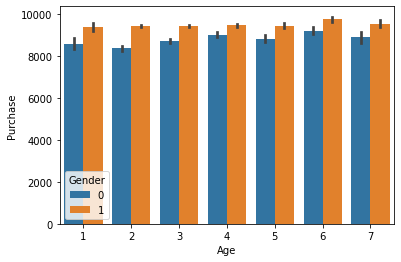

In [ ]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

purcahsing of men is high then women

visualization of purchase with occupation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


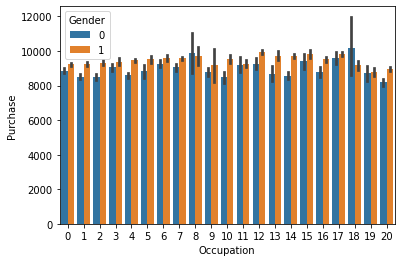

In [ ]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


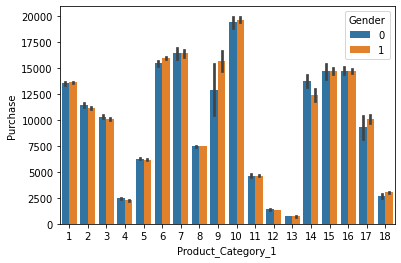

In [ ]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


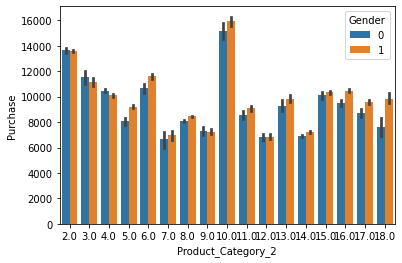

In [ ]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


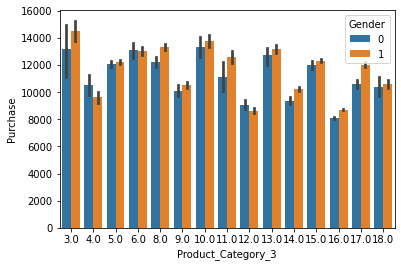

In [ ]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

Feature scaling

In [ ]:
df_test=df[df['Purchase'].isnull()]

In [ ]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
X=df_train.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [ ]:
y=df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
135523     6136.0
135524     5950.0
135525     6005.0
135526     5364.0
135527     8094.0
Name: Purchase, Length: 135528, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
#since productid is object so we drop the column
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

EDA AND FEATURING ENGINEERING PART IS DONE

In [ ]:
#train your model using ml 